In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from wordcloud import WordCloud

In [1]:
file_path = "/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


(None,
    rank                                              Video    Video views  \
 0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
 1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
 2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
 3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
 4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   
 
         Likes Dislikes Category  published  
 0   3,497,955   78,799    Music       2019  
 1      19,023      859      NaN       2017  
 2     293,563      NaN    Music       2024  
 3     680,732      NaN    Music       2023  
 4  44,428,537      NaN    Music       2015  )

In [2]:
# data cleaning

for col in ["Video views", "Likes", "Dislikes"]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [4]:
df["Dislikes"].fillna(0, inplace=True)
df["Category"].fillna("Unknown", inplace=True)
df["published"] = pd.to_datetime(df["published"], format="%Y")

<ipython-input-4-dcf127530dea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].fillna("Unknown", inplace=True)


In [6]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rank         1000 non-null   int64         
 1   Video        1000 non-null   object        
 2   Video views  1000 non-null   int64         
 3   Likes        1000 non-null   int64         
 4   Dislikes     1000 non-null   int64         
 5   Category     1000 non-null   object        
 6   published    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.8+ KB


(None,
    rank                                              Video  Video views  \
 0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54071677   
 1     2  20 Tennis shots if they were not filmed, NOBOD...      3471237   
 2     3                 JoJo Siwa - Karma (Official Video)     34206747   
 3     4    David Kushner - Daylight (Official Music Video)     18558390   
 4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...   6547981039   
 
       Likes  Dislikes Category  published  
 0   3497955     78799    Music 2019-01-01  
 1     19023       859  Unknown 2017-01-01  
 2    293563         0    Music 2024-01-01  
 3    680732         0    Music 2023-01-01  
 4  44428537         0    Music 2015-01-01  )

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


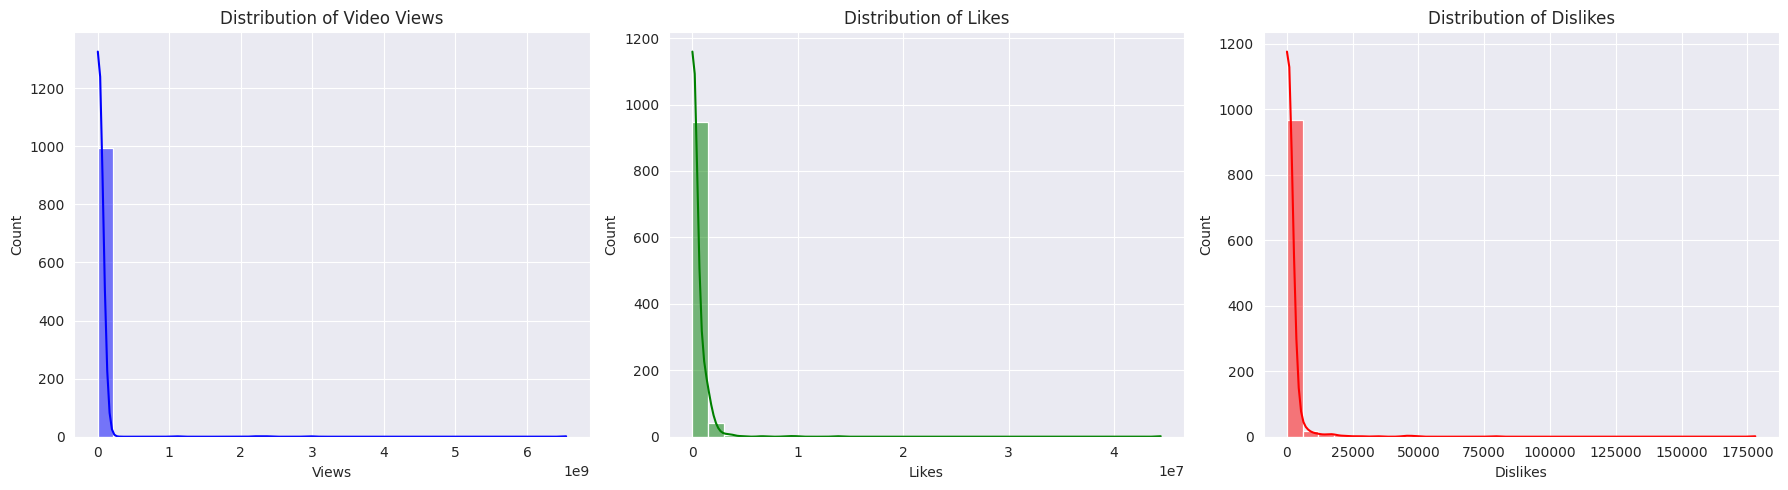

In [11]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Video views"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Video Views")
axes[0].set_xlabel("Views")

sns.histplot(df["Likes"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Likes")
axes[1].set_xlabel("Likes")

sns.histplot(df["Dislikes"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Dislikes")
axes[2].set_xlabel("Dislikes")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128511 (\N{MOYAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128037 (\N{FRONT-FACING BABY CHICK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


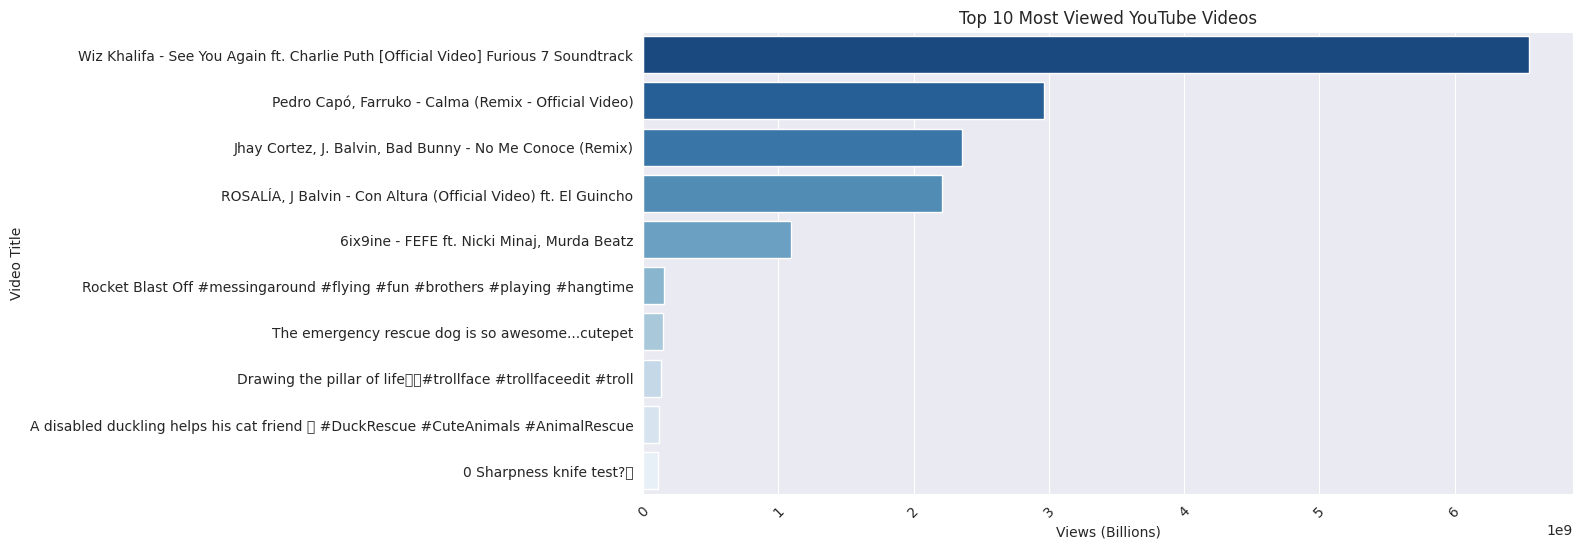

In [12]:
top_viewed_videos = df.nlargest(10, "Video views")

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_viewed_videos["Video views"],
    y=top_viewed_videos["Video"],
    palette="Blues_r"
)
plt.xlabel("Views (Billions)")
plt.ylabel("Video Title")
plt.title("Top 10 Most Viewed YouTube Videos")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128037 (\N{FRONT-FACING BABY CHICK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


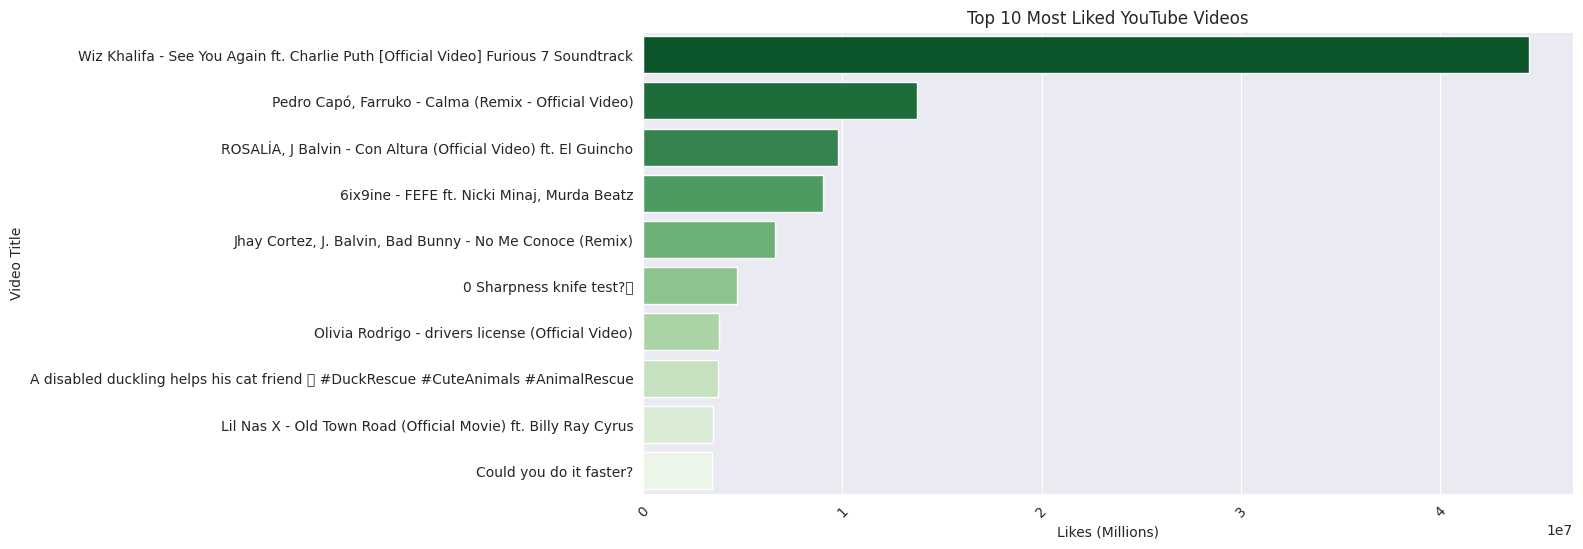

In [13]:
top_liked_videos = df.nlargest(10, "Likes")

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_liked_videos["Likes"],
    y=top_liked_videos["Video"],
    palette="Greens_r"
)
plt.xlabel("Likes (Millions)")
plt.ylabel("Video Title")
plt.title("Top 10 Most Liked YouTube Videos")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

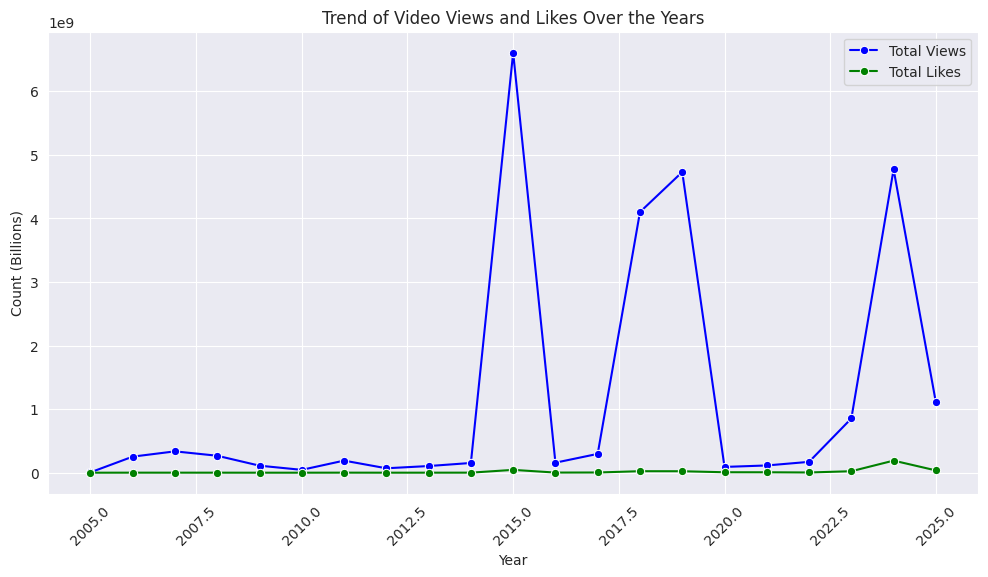

In [14]:
yearly_trends = df.groupby(df["published"].dt.year)[["Video views", "Likes"]].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x=yearly_trends.index, y="Video views", marker="o", label="Total Views", color="blue")
sns.lineplot(data=yearly_trends, x=yearly_trends.index, y="Likes", marker="o", label="Total Likes", color="green")

plt.xlabel("Year")
plt.ylabel("Count (Billions)")
plt.title("Trend of Video Views and Likes Over the Years")
plt.legend()
plt.xticks(rotation=45)
plt.show()

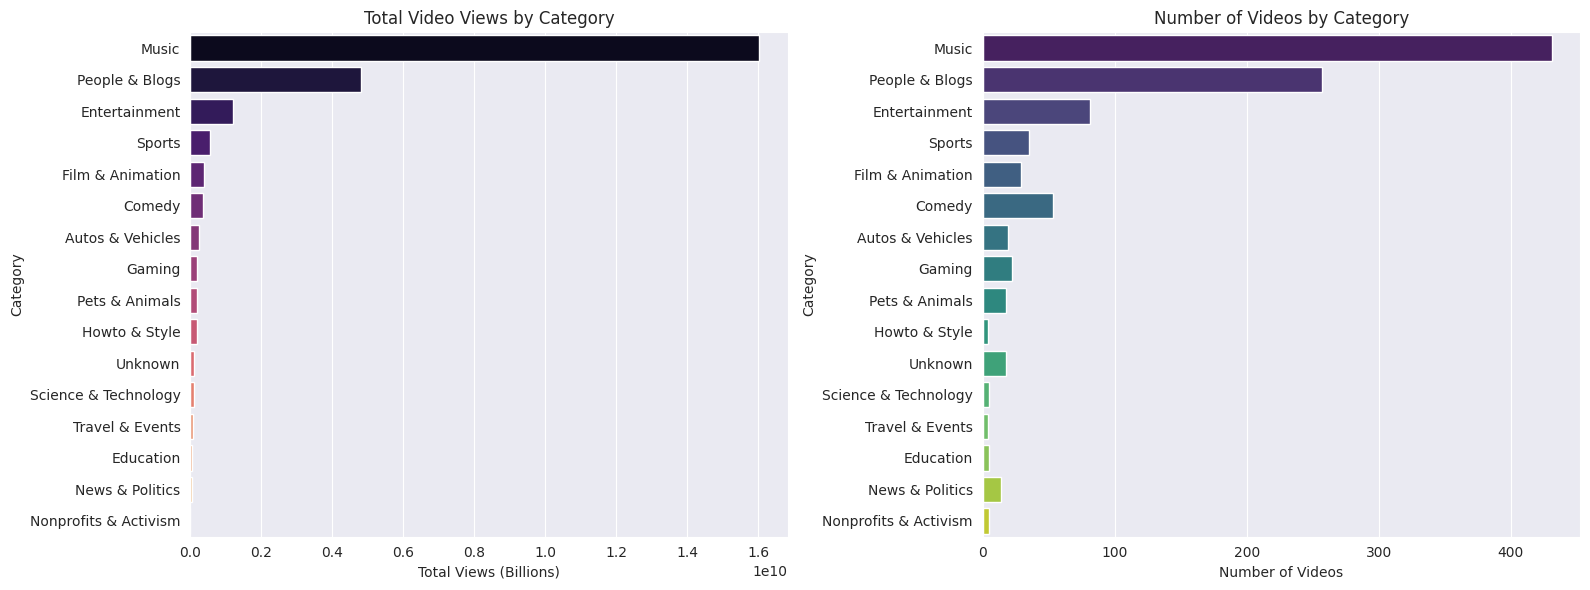

In [15]:
category_stats = df.groupby("Category").agg({"Video views": "sum", "rank": "count"}).rename(columns={"rank": "Video Count"})

category_stats = category_stats.sort_values(by="Video views", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    x=category_stats["Video views"],
    y=category_stats.index,
    palette="magma",
    ax=axes[0]
)
axes[0].set_title("Total Video Views by Category")
axes[0].set_xlabel("Total Views (Billions)")

sns.barplot(
    x=category_stats["Video Count"],
    y=category_stats.index,
    palette="viridis",
    ax=axes[1]
)
axes[1].set_title("Number of Videos by Category")
axes[1].set_xlabel("Number of Videos")

plt.tight_layout()
plt.show()

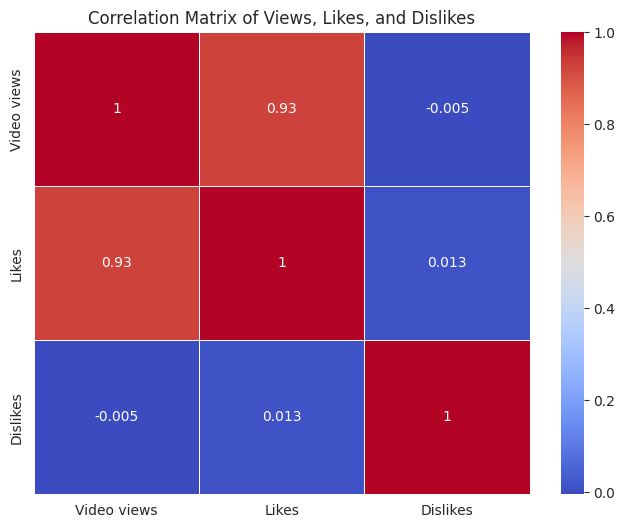

In [16]:
correlation_matrix = df[["Video views", "Likes", "Dislikes"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Views, Likes, and Dislikes")
plt.show()

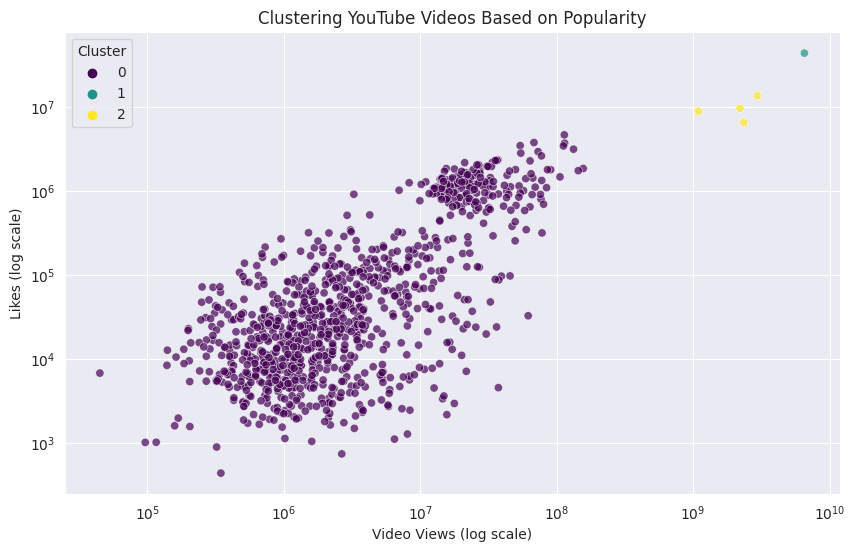

In [18]:
features = df[["Video views", "Likes"]]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Video views"],
    y=df["Likes"],
    hue=df["Cluster"],
    palette="viridis",
    alpha=0.7
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Video Views (log scale)")
plt.ylabel("Likes (log scale)")
plt.title("Clustering YouTube Videos Based on Popularity")
plt.legend(title="Cluster")
plt.show()

In [20]:
df_ml = df.copy()

df_ml = pd.get_dummies(df_ml, columns=["Category"], drop_first=True)

X = df_ml.drop(columns=["Video views", "Video", "rank", "published", "Cluster"])  # Dropping non-numeric columns
y = df_ml["Video views"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(52984925.639462024, 120833843.1181926, 0.7836815654268388)

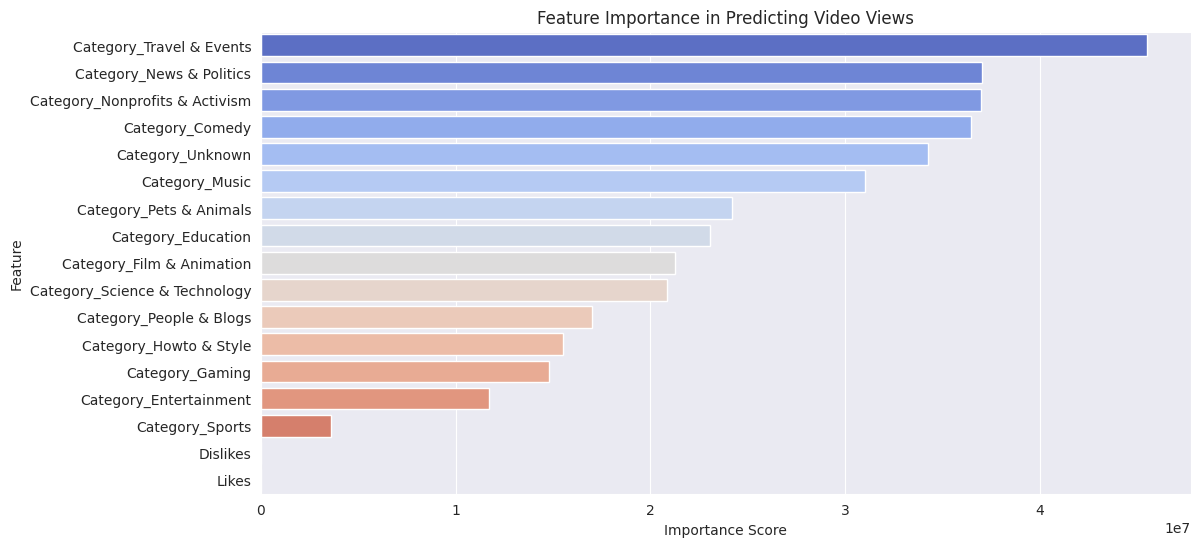

,Feature,Importance
15,Category_Travel & Events,4.548243e+07
9,Category_News & Politics,3.700580e+07
10,Category_Nonprofits & Activism,3.697173e+07
2,Category_Comedy,3.647019e+07
16,Category_Unknown,3.423911e+07
8,Category_Music,3.101815e+07
12,Category_Pets & Animals,2.418092e+07
3,Category_Education,2.305367e+07
5,Category_Film & Animation,2.127994e+07
13,Category_Science & Technology,2.086023e+07


In [21]:
importances = np.abs(model.coef_)
feature_names = X.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Video Views")
plt.show()

feature_importance_df.head(10)

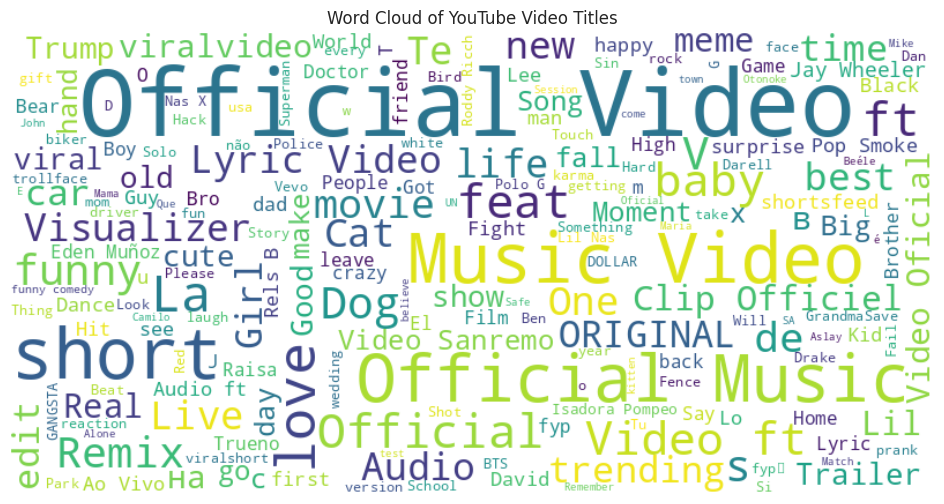

In [23]:
text = " ".join(df["Video"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of YouTube Video Titles")
plt.show()